Before starting, run the following cell and refresh the entire page.

In [ ]:
!ln -s /home/jovyan/data/figures figures

# Overview



## Introduction to functional magnetic resonance imaging (fMRI)

In this session, we will learn about fMRI data properties by loading, manipulating and visualizing it.

# Goals for today

We will go over some important concepts of data manipulation and visualization in fMRI, including: 

- Neuroscience concepts
    - Principles of fMRI 
    - Sampling rate
- Coding concepts
    - Array manipulation
    - Plotting time series data
    - Logical indexing for 1D, 2D data
- Datascience concepts
    - Histograms
    - Normalizing data
    

## Short overview of fMRI 

Functional Magnetic Resonance Imaging, or fMRI, is a measure of brain activity over time. FMRI data is acquired using a special pulse sequence designed to measure changes in the magnetic properties of the blood flow using the Magnetic Resonance Imaging (MRI) scanner.

<img src="figures/mri_scanner.png" style="height: 400px;">

The functional signal we measure with fMRI is *not* an electrical neural signal (as in EEG, ECoG, or electrophysiology). It is a magnetic signal related to the properties of brain tissue, and it is dominated by blood flow. Blood flow is related to neural activity, because firing neurons need oxygen. The process of firing involves letting electrically charged ions into a cell and actively pumping them back out again, which is metabolically demanding. So once a region of the brain becomes active (once the neurons start firing), metabolism in that region is high, oxygen gets stripped off of hemoglobin molecules in red blood cells in the area (thereby changing the magnetic properties of hemoglobin, creating a deoxyhemoglobin). This initiates a complex process to increase blood flow to the electrically active area. 

<img src="figures/deoxyhemoglobin.png" style="height: 400px;">


The specific mechanisms that lead from neural activity to changes in blood flow are (a) not well understood, and (b) beyond the scope of this class. For now, just know that there are several ways to measure functional responses with MRI, and the specific one that we work with is the Blood Oxygenation Level Dependent Response, or the BOLD response. 

### fMRI has high spatial but low temporal resolution

We have belabored this here a little because this complexity should always be a source of humility for anyone working with fMRI or trying to interpret fMRI results. It is an **indirect, slow measure** - and these considerations strongly constrain the kinds of experiments you can do with fMRI and the conclusions you can draw from those experiments.

An important practical upshot of this for our purposes is that the signal we measure changes much more slowly than the signal we measure in EEG or ECoG. Responses emerge over seconds, not milliseconds.

<img src="figures/imaging_modalities.png" style="height: 400px;">

                                      Sejnowski et al., Nature Neurosci., 2014




One fMRI image (fMRI volume) is acquired for a given unit of time called a repetition time (TR). A TR is typically 1-2 seconds *(usually 1.0, 1.5, or 2.0 seconds)*. Every image records the activity in the brain at a given point in time. The following image shows a single volume of fMRI data (one two-second snapshot of brain activity).

<img src="figures/fig1.png" style="height: 400px;">

The dimensions of the brain volume measured by fMRI can vary. Each individual fMRI measurement unit is called a *voxel*, which is short for volumetric pixel. The voxels in this data are about 2.4 x 2.4 x 4.0 mm$^3$ (X x Y x Z) in size. 

### FMRI activity in time

Once a neural event is triggered by a stimulus presentation the vascular system needs to respond to the need for glucose and oxygen in that specific brain area. This can take up to 1-2 seconds. Hence the hemodynamic response lags the triggered event by 1-2 seconds, which peaks around 5 seconds after the stimulus onset.

<img src="figures/lagged_activity.png" style="height: 400px;">

### Example fMRI experiments 

#### Viewing natural images 

<img src="figures/fmri_example_experiment.png" style="height: 400px;">

#### Fusiform Face Area (FFA)

<img src="figures/ffa.png" style="height: 400px;">



## FMRI as a *mapping* technique
The scanning volume for the data we will use here consists of 30 transverse slices (i.e. Z is between 0 and 29). Transverse slices are horizontal, i.e., approximately parallel to the plane of the eyes and ears. Each slice corresponds to a 2D image of 100 x 100 voxels.

We can measure fMRI responses across the whole brain. Therefore fMRI can be seen as a *mapping* technique. In order to make brain maps, we have to be able to match measured voxel responses to the participant's brain anatomy. Using a different type of MRI sequence, we can collect a **structural scan** (also called **anatomical scan**), and obtain a high resolution image of a participant's brain. Here is an example:

<img src="figures/MPRAGE_wcortex.png">

Most MRI measures activity in the cerebral cortex, or the outer layer of the brain. Using automated reconstruction software (and some manual editing), it's possible to build a 3D representation of the shape of the subject's cerebral cortex:

<img src="figures/cortex_3views.png">


In further lectures, we will learn how to overlay functional data onto the high resolution cortical representation for each individual the subject, so that we can make sense of the data.


## Storing fMRI data for data analysis

We store fMRI data as a matrix. This means that each volume (a timepoint) in the experiment will correspond to a row in the matrix, and each voxel will correspond to a column in that matrix. For this reason, we need to make sure the criteria we use to move each 3D image to a matrix row is preserved and this operation is inverted. Let's look at an example.

<img src="figures/fmri_dimensions.png">


## Loading data

fMRI data is stored in a variety of formats. The medical imaging community has a standardized image format called Digital Imaging and Communications in Medicine (DICOM) to handle and store raw medical imaging data. When data is collected using the MRI scanner each volume is stored in a DICOM file that contains both a header and the image data. The DICOM header stores useful information about the participant's name, pulse sequence, the type of scan, image dimensions, etc. (Another popular medical imaging format is the Analyze format, where the image and header file are stored separately.) You can read about these file formats [here](http://people.cas.sc.edu/rorden/dicom/index.html).

Before we start analyzing the data we convert the raw DICOM files into the commonly used Neuroimaging Informatics Technology Initiative (nifti) file format. Files stored in this format usually have the extension .nii or .nii.gz. 

We will use the `nibabel` python module to load data that is stored such data formats.

In [2]:
import nibabel
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt  # for visualization

# Set defaults for matplotlib plotting in the notebook
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In the following we will load one run (also referred to as a scan) worth of fMRI data that was stored as a nifti file format. 

In [3]:
# Create load the fMRI data
fname = '/home/jovyan/data/sub01_categories1_1.npy'
data = np.load(fname) 
data = data.astype('float32')

print('data.shape : ', data.shape)

data.shape :  (100, 100, 30, 120)


In [5]:
data.shape

(100, 100, 30, 120)

#### The print function
There are multiple ways to use the print function in python:

In [8]:
print('The first dimension of the data is:', data.shape[0], 'and the second dimension is:', data.shape[1])
print('The first dimension of the data is: {0} and the second dimension is: {1}'.format(data.shape[0], data.shape[1]))

The first dimension of the data is: 100 and the second dimension is: 100
The first dimension of the data is: 100 and the second dimension is: 100


#### Arrays in python

You can make arrays in python using lists:

In [9]:
row1 = [1, 2, 3, 4]
row2 = [5, 6 ,7, 8]
row3 = [9, 10, 11, 12]
example_array = np.array([row1, row2, row3])
print(example_array)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Another way to create the array above is by using the function range, which creates a list of successive numbers:

In [19]:
np.arange(12,120)

array([ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119])

In [20]:
row1 = np.arange(1,5)
row2 = np.arange(5,9)
row3 = np.arange(9,13)
example_array_2 = np.array([row1, row2, row3])
print(example_array_2)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


An of course you can create arrays with arbitrarily values:

In [21]:
row1 = [3, -2, 2, 9.3]
row2 = [-5, 3 ,2 , 22]
row3 = [72, 12, 1.4, 2]
example_array_2 = np.array([row1, row2, row3])
print(example_array_2)

[[  3.   -2.    2.    9.3]
 [ -5.    3.    2.   22. ]
 [ 72.   12.    1.4   2. ]]


Let's print the shape of the array:

In [22]:
print("This array has shape {}.".format(example_array_2.shape))

This array has shape (3, 4).


###  Breakout session

Now we will explore the transpose function. 
- Start by defining an array A with 4 rows and 2 colums. You can set whatever values you want. 
- Then, use the np.transpose function to transpose that array and call the new array At. 
- Print A, the shape of A, At and the shape of At.  
- What does the transpose function do?

In [28]:
### STUDENT ANSWER
A = np.array( [ [3,4], [2,7], [-3,6], [2,6]  ] )
print(A)
print("A has shape {0}".format(A.shape))
At = np.transpose(A)
print(At)
print("At has shape {0}".format(At.shape))

[[ 3  4]
 [ 2  7]
 [-3  6]
 [ 2  6]]
A has shape (4, 2)
[[ 3  2 -3  2]
 [ 4  7  6  6]]
At has shape (2, 4)


One can also use the .T notation to obtain a transpose:

In [27]:
row1 = np.arange(1,5)
row2 = np.arange(5,9)
row3 = np.arange(9,13)
B = np.array([row1, row2, row3])
Bt = B.T
print(B)
print("This array has shape {}.".format(B.shape))
print(Bt)
print("This array has shape {}.".format(Bt.shape))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
This array has shape (3, 4).
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]
This array has shape (4, 3).


These were 2 dimensional arrays. Let's explore 3 dimensional arrays:

In [29]:
a1 = np.arange(1,5)
a2 = np.arange(5,9)
a3 = np.arange(9,13)
A1 = np.array([a1,a2,a3])
print("A1:")
print(A1)
print("This array has shape {}.".format(A1.shape))

a4 = np.arange(13,17)
a5 = np.arange(17,21)
a6 = np.arange(22,26)
A2 = np.array([a4,a5,a6])
print("A2:")
print(A2)
print("This array has shape {}.".format(A2.shape))

A_3d = np.array([A1,A2])
print("A_3d:")
print(A_3d)
print("This array has shape {}.".format(A_3d.shape))

A1:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
This array has shape (3, 4).
A2:
[[13 14 15 16]
 [17 18 19 20]
 [22 23 24 25]]
This array has shape (3, 4).
A_3d:
[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [22 23 24 25]]]
This array has shape (2, 3, 4).


In [31]:
A_3d[0,1,2]

7

What happens when you transpose a 3d array?

In [32]:
A_3d_t = A_3d.T
print("A_3d_t:")
print(A_3d_t)
print("This array has shape {}.".format(A_3d_t.shape))

A_3d_t:
[[[ 1 13]
  [ 5 17]
  [ 9 22]]

 [[ 2 14]
  [ 6 18]
  [10 23]]

 [[ 3 15]
  [ 7 19]
  [11 24]]

 [[ 4 16]
  [ 8 20]
  [12 25]]]
This array has shape (4, 3, 2).


The order of the dimensions is inverted (e.g. the last dimension becomes the first dimension).

Let's go back to our loaded 4D fMRI data:

In [33]:
print('The shape of the data is: {0}'.format(data.shape))
print('Each volume has {0} entries on the X axis, {1} on Y, {2} on Z. There are {3} volumes.'.format(
        data.shape[0],data.shape[1],data.shape[2],data.shape[3]))

The shape of the data is: (100, 100, 30, 120)
Each volume has 100 entries on the X axis, 100 on Y, 30 on Z. There are 120 volumes.


The dimensions of the data are (X, Y, Z, T) (T is time, in TRs). Thus, there are 120 volumes (120 time points). Each volume has 30 horizontal or transverse slices with 100 x 100 pixels.

<img src="figures/slices.png" style="height: 200px;">

#### Transpose data

When we work with functional images it is in general more convenient (for reasons like averaging over time, transfering data to a standard units, etc.) to have the data in T, Z, Y, X format. The reasons for this convention will become more obvious as we go, and we see how this convention makes for convenient syntax and shortcuts. 

Hence, we will use the `transpose` function  of the numpy package (or `.T` method of numpy arrays) to make this dimensional switch.

In [34]:
# Transpose the data
dataT = data.T

print("data shape :", data.shape)
print("dataT shape : ", dataT.shape)

data shape : (100, 100, 30, 120)
dataT shape :  (120, 30, 100, 100)


## Exploring the data

For fMRI, the functions we will use to explore the data are in general somewhat basic. We will construct our own functions for looking at the data!

This is a little bit of work, but is very generalizable to other kinds of analyses, and if you get good at it you can make exactly the plot of your data that you want.

One of the first questions about a data set (after its size) that you should explore is 

    "What is the scale (min/max) of the data?". 

Afterwards you may be interested to know its mean, standard deviation, and how in general the data looks like and make a histogram plot of the data.

In [35]:
# Keep data transposed
data = dataT

del dataT
print(data.shape)
print('There are {0} volumes. Each volume has {1} entries on the Z axis, {2} on Y, {3} on Z. '.format(
        data.shape[0],data.shape[1],data.shape[2],data.shape[3]))

(120, 30, 100, 100)
There are 120 volumes. Each volume has 30 entries on the Z axis, 100 on Y, 100 on Z. 


#### Breakout Session

Now that the data is in a ready to use format, we will explore it.

- Using the functions np.min and np.max, print the minimum and maximum values of the data.
- Using np.mean, print the average value of the data.
- Using np.std, print the standard deviation of the data. 

In [39]:
### STUDENT ANSWER
print(np.min(data))
print(np.max(data))
print(np.mean(data))
print(np.std(data))

-28.1875
2844.0
192.021
344.51


Now let's introduce the function flatten:

In [40]:
row1 = range(1,5)
row2 = range(5,9)
row3 = range(9,13)
B = np.array([row1, row2, row3])
print('B:')
print(B)
print('Flattened B:')
print(B.flatten())

B:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Flattened B:
[ 1  2  3  4  5  6  7  8  9 10 11 12]


What does flatten do?

(120, 30, 100, 100)
(36000000,)


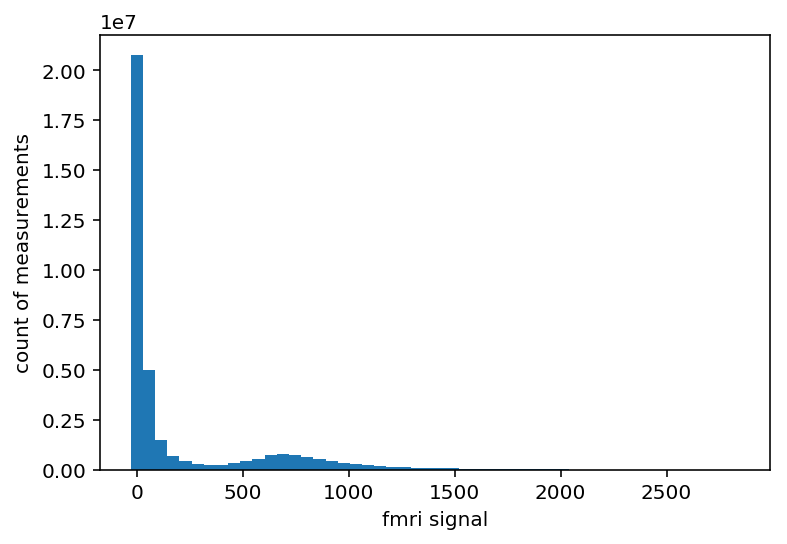

In [44]:
# Make a histogram of the data
print(data.shape)
# print('First 10 values of flattened data:')
# print(data.flatten()[:10])
print(data.flatten().shape)
_ = plt.hist(data.flatten(), bins=50)
plt.xlabel('fmri signal')
plt.ylabel('count of measurements')

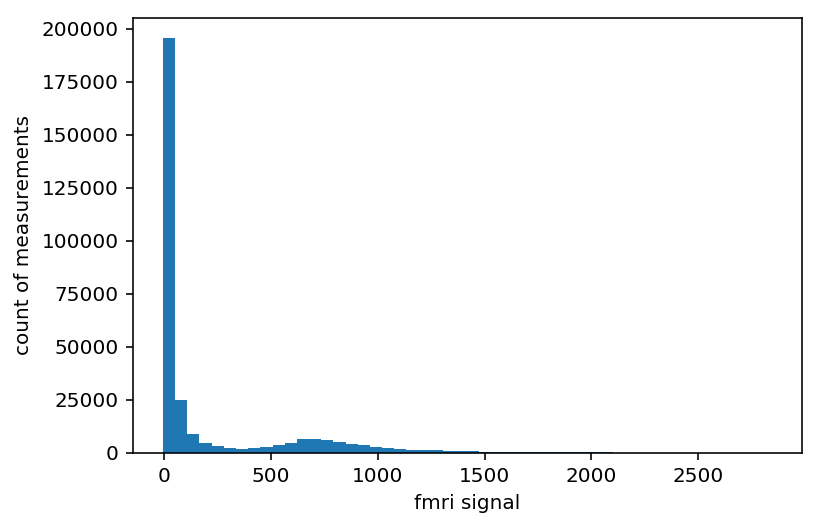

In [45]:
_ = plt.hist(data[0,:,:,:].flatten(), bins=50)
plt.xlabel('fmri signal')
plt.ylabel('count of measurements')

### Breakout session:

- What does this tell you about the data? 
- What are the axes on this plot? 
- Why is there so many zeros?

### Plot the timecourse of a single voxel
Now we can plot the timecourse for one voxel somewhere in the middle of the brain (e.g. at Z=10, Y=34, X=34)

In [56]:
data[:,10,34,34].shape

(120,)

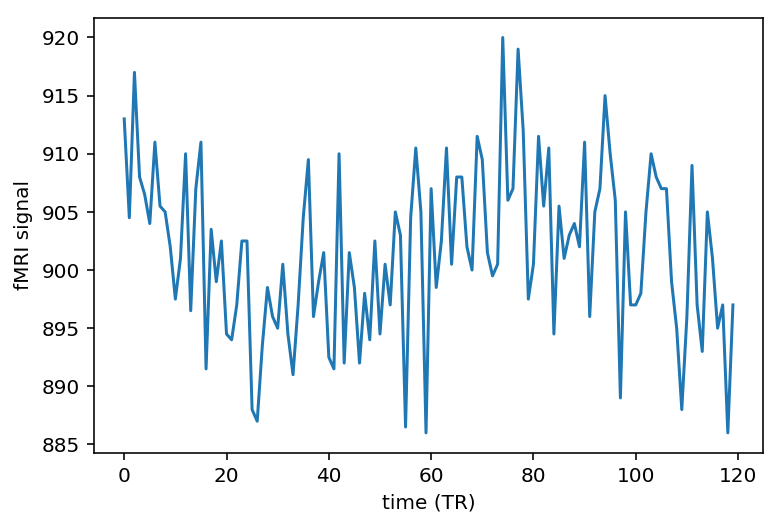

In [59]:
_ = plt.plot(data[:, 10, 34, 34])
plt.xlabel('time (TR)')
plt.ylabel('fMRI signal')

Now let's chose X=45 and Y = 45 (or other values). This is a transverse slice. We have 120 time points for each of 30 Z locations. Let's plot these:

In [ ]:
transverse = data[:,:,45,45]
plt.plot(transverse);
plt.xlabel('time')
plt.ylabel('fMRI activity')


Let's make a legend for this plot. We will need to use a for loop:

In [ ]:
legend = []
for i in range(30):
    legend.append('Z = {}'.format(i))
    
print(legend)

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(transverse);
plt.xlabel('time')
plt.ylabel('fMRI activity')
plt.legend(legend,bbox_to_anchor=(1.1, 1));

What do you notice? Do different Z locations have the same mean? Is that mean useful? Does it seem like we need to normalize them?

Another way of looking at this data is to plot the transpose of the transverse matrix above:

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(transverse.T);
plt.xlabel('Z')
plt.ylabel('fMRI activity')
legend = []
for i in range(120):
    legend.append('Time = {}'.format(i))
plt.legend(legend,bbox_to_anchor=(2, 1),ncol=4);

This is not a usual plot, but we are using it here to show how different Z slices have different means and variation for all the time points. This variation is the same throughout the duration of the scan. We will therefore need to normalize the data somehow to remove the variation. What is a way you would suggest?

In [ ]:
# compute the minimum of all columns Z:
print('shape of transverse matrix is {0}'.format(transverse.shape))
min_vec = np.min(transverse, axis = 0)
print(min_vec)
print('shape of min_vec is {0}'.format(min_vec.shape))

In the homework, you will be asked to use np.min and np.max to normalize the transverse matrix above. You will need to make the minimum of every column be 0 and the maximum be 1. As an example, Here is how you make the minimum of every column be 0: 

In [ ]:
transverse_min0 = transverse - np.min(transverse, axis = 0)
plt.figure(figsize=(10,10))
plt.plot(transverse_min0);
plt.xlabel('time')
plt.ylabel('fMRI activity')
plt.legend(legend,bbox_to_anchor=(1.1, 1));

What do you notice? What changed? 

Note that we have 30,000 measurements to plot like this. So we *could* make a plot like the eeg representations that we had, but those were pretty busy even with 60 lines. So, instead, we will view our data as images. We will be doing these manipulations next week.